# Klasyfikacja chorób na podstawie objawów

### Wczytanie bibliotek

In [13]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import faiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

import pickle

### Wczytanie danych

In [14]:
diseases_data = pd.read_csv("../Data/Final_Augmented_dataset_Diseases_and_Symptoms.csv")

labels = diseases_data.iloc[:, 0]
data = diseases_data.iloc[:, 1:]

print(diseases_data.shape)
diseases_data.head()

(246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Analiza danych

In [15]:
diseases_data.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [16]:
diseases_data.isna().any()

diseases                            False
anxiety and nervousness             False
depression                          False
shortness of breath                 False
depressive or psychotic symptoms    False
                                    ...  
hip weakness                        False
back swelling                       False
ankle stiffness or tightness        False
ankle weakness                      False
neck weakness                       False
Length: 378, dtype: bool

In [17]:
diseases_data.isnull().any()

diseases                            False
anxiety and nervousness             False
depression                          False
shortness of breath                 False
depressive or psychotic symptoms    False
                                    ...  
hip weakness                        False
back swelling                       False
ankle stiffness or tightness        False
ankle weakness                      False
neck weakness                       False
Length: 378, dtype: bool

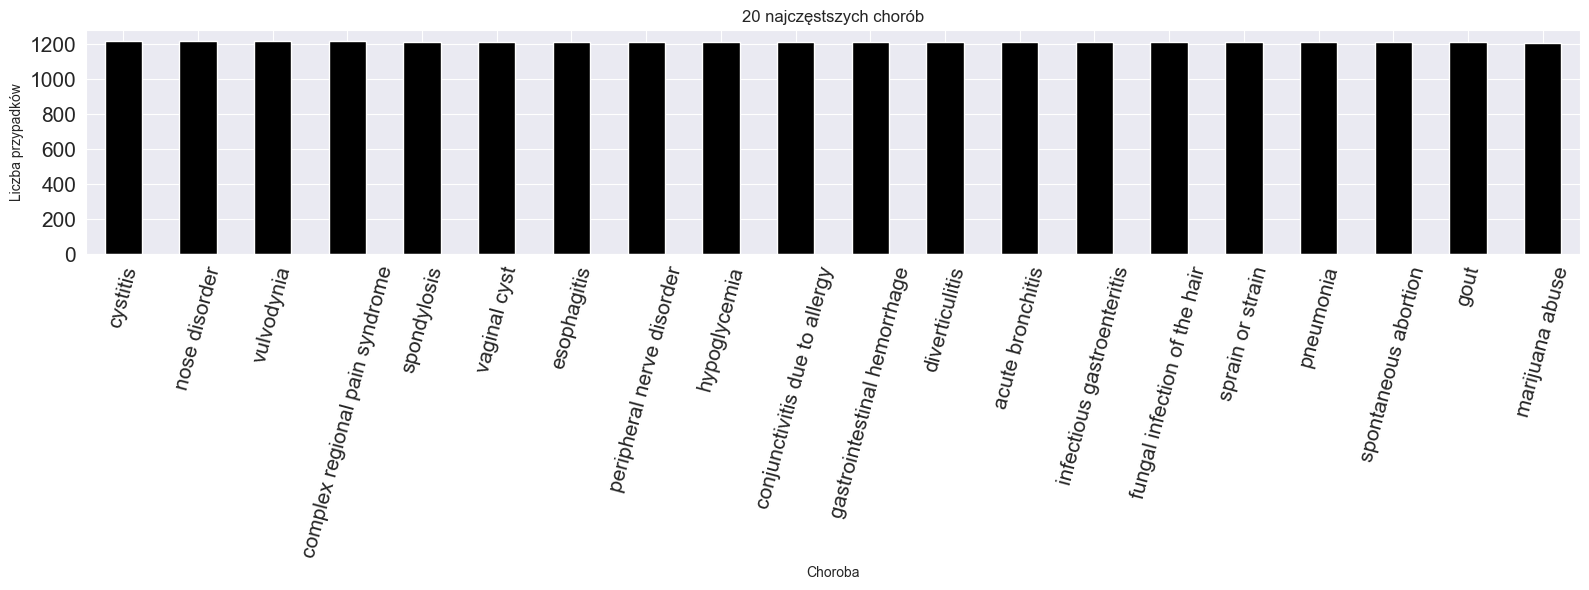

In [18]:
plt.figure(figsize=(16, 6))
labels.value_counts().head(20).plot(kind='bar', color='black', fontsize=15)
plt.title('20 najczęstszych chorób')
plt.xlabel('Choroba')
plt.ylabel('Liczba przypadków')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Wyrównanie ilości danych za pomocą SMOT, aby nie wykluczać rzadkich chorób
https://datascience.eu/pl/programowanie-komputerowe/smote/

In [19]:
# Choroby z jednym wystąpieniem

label_counts = labels.value_counts()

rare_labels = label_counts[label_counts == 1].index

rare_labels

Index(['turner syndrome', 'rocky mountain spotted fever',
       'open wound of the cheek', 'high blood pressure',
       'open wound due to trauma', 'open wound of the chest',
       'huntington disease', 'open wound of the knee',
       'foreign body in the nose', 'diabetes', 'thalassemia', 'heat stroke',
       'gas gangrene', 'typhoid fever', 'open wound of the head',
       'myocarditis', 'chronic ulcer', 'hypergammaglobulinemia',
       'kaposi sarcoma'],
      dtype='object', name='diseases')

In [20]:
# Duplikacja danych do 2 dla rzadkich chorób - SMOTE wymaga min.2

rare_data = data[labels.isin(rare_labels)]
rare_labels_series = labels[labels.isin(rare_labels)]

# Duplikujemy te rekordy
duplicated_data = rare_data.copy()
duplicated_labels = rare_labels_series.copy()

# Scalanie oryginalnych danych z duplikatami
data_augmented = pd.concat([data, duplicated_data], ignore_index=True)
labels_augmented = pd.concat([labels, duplicated_labels], ignore_index=True)

print(f"Liczba rekordów przed SMOTE: {len(labels_augmented)}")

Liczba rekordów przed SMOTE: 246964


In [21]:
smote = SMOTE(k_neighbors=1)
data, labels = smote.fit_resample(data_augmented, labels_augmented)

In [22]:
print(f"Liczba rekordów po SMOTE: {len(labels)}")

Liczba rekordów po SMOTE: 942287


### Podział danych

In [23]:
sample_size = 1000
sample_data = data.sample(n=sample_size, random_state=42)
sample_labels = labels.loc[sample_data.index]

X_train, X_test, Y_train, Y_test = train_test_split(sample_data, sample_labels, test_size=0.2, random_state=10)

### Trenowanie modeli
https://arithmancylabs.medium.com/understanding-faiss-indexing-86ec98048bd9

In [31]:
# Użyłem modelu KNN z biblioteki faiss (Facebook AI Similarity Search)
# Model KNN z biblioteki scikit-learn jest nie wydajny dla dużej ilości danych
# KNN i drzewa decyzyjne działają na całości danych - nie da się podzielić na mniejsze porcje do stopniowego trenowania modelu

models = {
    "DecisionTree": DecisionTreeClassifier(random_state=10),
    "LogisticRegression": LogisticRegression(random_state=10),
    "KMeans": KMeans(n_clusters=len(set(Y_train)), random_state=10),
    "KNN": "FAISS" 
}

results = {}

faiss_index = None
faiss_labels = None

for name, model in models.items():
    start_time = time.time()
    
    if name == "KNN":
        dimension = X_train.shape[1]  # Liczba wymiarów danych (cech)
        index = faiss.IndexFlatL2(dimension)  # Indeks FAISS do wyszukiwania sąsiadów przy użyciu metryki L2 (Euklidesowej).
        index.add(np.array(X_train).astype('float32'))  # Dodanie danych treningowych do indexu i przekształcenie na float32 

        _, Indexes = index.search(np.array(X_test).astype('float32'), k=3)  # Przeszukuje indeks FAISS w poszukiwaniu 3 najbliższych sąsiadów dla każdego rekordu z X_test

        y_pred = []
        for neighbors in Indexes:
            neighbor_labels = Y_train.iloc[neighbors]  # Etykiety (choroby) sąsiadów
            most_common = Counter(neighbor_labels).most_common(1)[0][0]  # 1 najczęściej występująca choroba wśród tych 3 sąsiadów
            y_pred.append(most_common)  

        accuracy = accuracy_score(Y_test, y_pred)
        results[name] = {"accuracy": accuracy, "time": time.time() - start_time}
        
        faiss_index = index
        faiss_labels = Y_train.to_numpy()

    elif name == "KMeans":
        model.fit(X_train)
        cluster_labels = model.predict(X_test)  # Przewidujemy, do którego klastra należy każdy rekord testowy

        cluster_to_label = {}  # Słownik numer klastra -> etykieta
        train_clusters = model.predict(X_train)  # Sprawdzamy, do których klastrów należą dane treningowe
        
        for i in range(model.n_clusters):
            labels_in_cluster = Y_train[train_clusters == i]  # Wybieramy wszystkie etykiety y_train
            
            # Jeżeli są jakieś etykiety w tym klastrze, to bierzemy najczęściej występującą etykietę i przypisujemy ją jako etykietę dla całego klastra
            if len(labels_in_cluster) > 0:
                cluster_to_label[i] = Counter(labels_in_cluster).most_common(1)[0][0]
            else:
                cluster_to_label[i] = "unknown"

        pred_labels = [cluster_to_label.get(c, "unknown") for c in cluster_labels]  # Dla każdego klastra przypisanego do X_test, zamieniamy numer klastra na nazwę choroby
        
        accuracy = accuracy_score(Y_test, pred_labels)
        results[name] = {"accuracy": accuracy, "time": time.time() - start_time}

    else:
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test, preds)
        results[name] = {"accuracy": accuracy, "time": time.time() - start_time}
    
print("Podsumowanie wyników:")
for model_name, metrics in results.items():
    print(f"{model_name}: Dokładność: {metrics['accuracy']:.3f}, \nczas trenowania modelu: {metrics['time']:.3f}s\n")

Podsumowanie wyników:
DecisionTree: Dokładność: 0.260, 
czas trenowania modelu: 0.097s

LogisticRegression: Dokładność: 0.245, 
czas trenowania modelu: 0.473s

KMeans: Dokładność: 0.240, 
czas trenowania modelu: 0.216s

KNN: Dokładność: 0.325, 
czas trenowania modelu: 0.025s



### Zapis modeli do plików

In [32]:
for name, model in models.items():
    if name == "KNN":
        faiss.write_index(faiss_index, "../Models_Files/KNN_faiss.index")
        np.save("../Models_Files/KNN_labels.npy", faiss_labels)
    else:
        with open(f"../Models_Files/{name}_model.pkl", "wb") as file:
            pickle.dump(model, file)